### I did this assignment when I was in the data analytics diploma program with Digipen Singapore and credit goes to Digipen for giving this assignment

# Python Practicum 2 - EDA with Python Libraries

This practicum comprises 2 sections which require the use of 2 different datasets.

<br>

<u>**1. International Monetary Fund**</u><br>

Uses the excel file called `WEOApr2020all.xlsx`. This file was obtained  from the [**International Monetary Fund**](https://www.imf.org/external/pubs/ft/weo/2020/01/weodata/index.aspx) and it contains data from the World Economic Outlook that pertains to national accounts, inflation, unemployment rates, balance of payments, fiscal indicators, trade for countries and country groups (aggregates), and commodity prices whose data are reported by the IMF.

**Note:** The data is in a tabular format and **delimited** with a **tab** as a separator. 

<br>

<u>**2. AirBnB Open Data - New York City**</u><br>

Uses the CSV file called `AB_NYC_2019.csv`. This file was obtained from [Kaggle.com](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) and it contains data that pertains to hosts, geographical availability, etc.

**Note:** The data is in a tabular format and **delimited** with a **comma** as a separator. 

<br>

You are encouraged to open the file in a spreadsheet program to examine the data. Your task is to use Python and the following list of libraries to code the processes defined by the questions. **Leave in the relevant codes used for testing but comment them out before submission.** You are also encouraged to use as many code cells as necessary to complete the tasks.

**Note**: Take care not to overwrite your loaded dataset.

**Permissible Libraries**
* Pandas
* NumPy
* Matplotlib

**Deliverables**:
- Follow the instructions as detailed in this file.
- Do not modify any cell within this file unless otherwise stated.
- Once you have completed this assignment, navigate to `Kernel` in the menu and click on `Restart Kernel and Run All Cells...`. You are to ensure that each cell has been completed and that they run without errors.
- Before submitting, click on `Restart Kernel and Clear All Outputs...`. Then, zip all files in the format `CET2011_P02_<student_name>.zip`. 
- Failure to do so will be awarded **ZERO** marks.

---

## General Part

Load the required libraries **(3 marks)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## International Monetary Fund

**Q1)** Load the data into memory using Pandas; perform a preliminary first clean of the data and return this data. **(6 marks)**
 * Perform standard checks such as missing data, datatypes, etc.
 * Ensure that the column names are of the same datatype 'string'.
 * Rows that are not required can be removed.

In [2]:
imf_df = pd.read_excel('./datasets/WEOApr2020all.xlsx', na_values = '--') #loading WEOApr2020all.xlsx into pandas DF


In [3]:
#check info of imf data to see their data types, no. of rows & columns and any missing data
imf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               1553 non-null   object 
 1   ISO                            1552 non-null   object 
 2   WEO Subject Code               1552 non-null   object 
 3   Country                        1552 non-null   object 
 4   Subject Descriptor             1552 non-null   object 
 5   Subject Notes                  1552 non-null   object 
 6   Units                          1552 non-null   object 
 7   Scale                          194 non-null    object 
 8   Country/Series-specific Notes  1467 non-null   object 
 9   1980                           824 non-null    float64
 10  1981                           886 non-null    float64
 11  1982                           898 non-null    float64
 12  1983                           909 non-null    f

In [4]:
#look at summarized missing data for imf
imf_df.isnull().sum()

WEO Country Code                    1
ISO                                 2
WEO Subject Code                    2
Country                             2
Subject Descriptor                  2
Subject Notes                       2
Units                               2
Scale                            1360
Country/Series-specific Notes      87
1980                              730
1981                              668
1982                              656
1983                              645
1984                              639
1985                              625
1986                              619
1987                              612
1988                              599
1989                              589
1990                              535
1991                              491
1992                              441
1993                              371
1994                              352
1995                              309
1996                              282
1997        

In [5]:
#last 2 rows have almost no information and just a message, not useful for analyzing 

imf_df.tail()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
1549,698,ZWE,LUR,Zimbabwe,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,698,ZWE,GGXCNL_NGDP,Zimbabwe,General government net lending/borrowing,Net lending (+)/ borrowing (?) is calculated a...,Percent of GDP,NaN,Source: Ministry of Finance or Treasury Latest...,NaN,...,-0.621,-0.421,-1.418,-6.242,-8.113,-4.499,-2.575,-4.931,-1.518,2018.0
1551,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,Source: Reserve Bank of Zimbabwe and Ministry ...,NaN,...,-13.230,-11.563,-7.617,-3.580,-1.299,-5.896,1.133,-1.914,-1.894,2018.0
1552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#set the data type of the column names as string
imf_df.columns = imf_df.columns.astype(str)

In [7]:
#delete last 2 rows of imf df
imf_df.drop([1552,1553], axis=0, inplace = True)


In [8]:
#check to see last 2 rows are dropped
imf_df.tail()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
1547,698,ZWE,PCPIPCH,Zimbabwe,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,1.632,-0.213,-2.410,-1.558,0.907,10.607,255.292,319.036,3.700,2019.0
1548,698,ZWE,PCPIEPCH,Zimbabwe,"Inflation, end of period consumer prices",Annual percentages of end of period consumer ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,0.331,-0.796,-2.473,-0.898,3.430,42.074,521.150,154.297,3.000,2019.0
1549,698,ZWE,LUR,Zimbabwe,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,698,ZWE,GGXCNL_NGDP,Zimbabwe,General government net lending/borrowing,Net lending (+)/ borrowing (?) is calculated a...,Percent of GDP,NaN,Source: Ministry of Finance or Treasury Latest...,NaN,...,-0.621,-0.421,-1.418,-6.242,-8.113,-4.499,-2.575,-4.931,-1.518,2018.0
1551,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,Source: Reserve Bank of Zimbabwe and Ministry ...,NaN,...,-13.230,-11.563,-7.617,-3.580,-1.299,-5.896,1.133,-1.914,-1.894,2018.0


**Q2)** Using an appropriate graph, visualize the unemployment rates from 2010 - 2019 for the 5 countries with the highest mean unemployment rates over these 10 years. **(15 marks)**

- Assume all `NaN` values are 0s (i.e. change all `NaN` values to 0).   
- A properly labeled figure of size (13 by 10) must be displayed as the end result at the last code cell of this question.   
- Save the figure with a dpi of `200` and name it `imf_plot01.png` (This file is to be submitted).

In [9]:
#get unemployment rate data for 2010 - 2019
ur_imf = imf_df[imf_df['Subject Descriptor'] == 'Unemployment rate'][['Country','2010','2011','2012','2013','2014','2015',
                                        '2016','2017','2018','2019']]
ur_imf.fillna(value=0, inplace=True)

In [10]:
#get the countries with the top 5 unemployment rate means
ur_mean = ur_imf[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']].mean(axis=1)
ur_c = ur_imf['Country']
ur_cmean = pd.concat([ur_c,ur_mean], axis = 1)
ur_cmean.columns = ['Country','Unemployment_rate_mean']

In [11]:
#countries with top 5 unemployment rate means
ur_top5 = ur_cmean.nlargest(5,'Unemployment_rate_mean')

In [12]:
ur_top5country = ur_imf[ur_imf['Country'].isin(ur_top5['Country'])]

In [13]:
#df used for plotting line chart
ur_plot = ur_top5country.reset_index().drop('index', axis=1).set_index('Country').transpose()

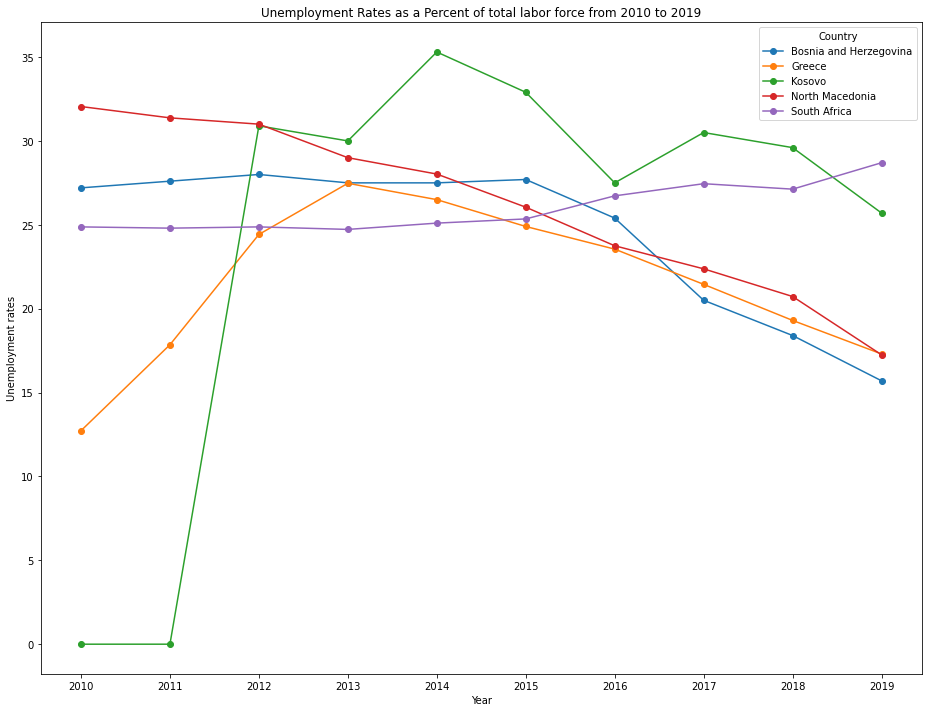

In [14]:
#creating line chart
ur_plot.plot(kind = 'line', figsize = (13,10), marker = 'o')
plt.title('Unemployment Rates as a Percent of total labor force from 2010 to 2019')
plt.xlabel('Year')
plt.ylabel('Unemployment rates')

years = ur_plot.index.tolist()
plt.xticks(range(len(years)), years, rotation=0)
# Save the figure with a dpi of 200
plt.savefig('imf_plot01.png', dpi=200, facecolor = 'white') 
plt.tight_layout()
plt.show()

**Q3)** Using an appropriate graph, show the comparison of how SARS (2003), H1N1 (2010) and COVID-19 (2020) have affected the `Gross domestic product, constant prices` for countries around South East Asia (i.e., 'Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao P.D.R.', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam'). **(35 marks)**

- Your graph should be properly annotated and numerical values should be formatted to 2 decimal places.   
- A properly labeled figure of size (15 by 10) must be displayed as the end result at the last code cell of this question.   
- Save the figure with a dpi of `200` and name it `imf_plot02.png` (This file is to be submitted).   

In [15]:
#condition for GDP 
sd_imf = imf_df['Subject Descriptor']=='Gross domestic product, constant prices'
c = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao P.D.R.', 
    'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 
    'Thailand', 'Timor-Leste', 'Vietnam']
#condition for SEA countries
sea_imf = imf_df['Country'].isin(c)
#df created on these conditions
gdp_imf = imf_df[sd_imf & sea_imf][['Country','2003','2010','2020']]


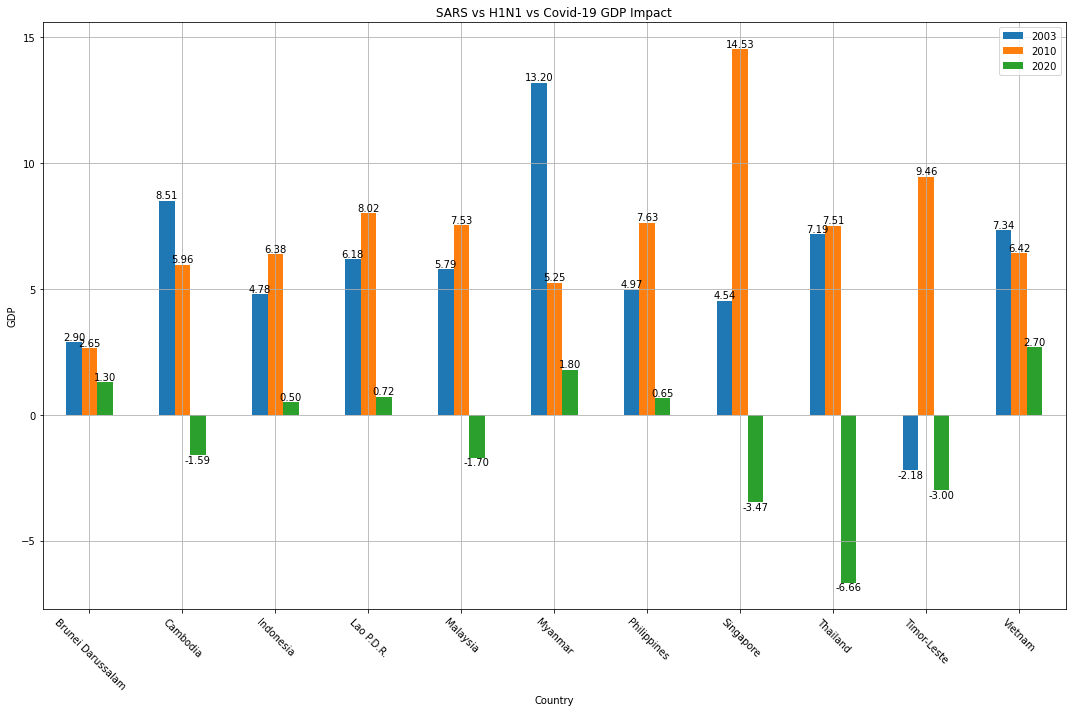

In [16]:
#plotting bar chart for the GDP during pandemic years
ax = gdp_imf.plot.bar(x = 'Country', rot = 315, figsize=(15, 10), title = 'SARS vs H1N1 vs Covid-19 GDP Impact',
     grid = True, ylabel = 'GDP')

for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fmt = '%.2f')

plt.tight_layout()
# Save the figure with a dpi of 200
plt.savefig('imf_plot02.png', dpi=200, facecolor = 'white')
plt.show()

---

### AirBnB Open Data - New York City

**Q1)** Load the data into memory using Pandas; perform a preliminary first clean of the data and return this data. **(3 marks)**
* Perform standard checks such as missing data, datatypes, etc.

In [17]:
air_df = pd.read_csv('./datasets/AB_NYC_2019.csv') #loading AB_NYC_2019.csv into pandas DF

In [18]:
#check info of Air BnB data to see their data types, no. of rows & columns and any missing data
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [19]:
#look at summarized missing data for Air BnB
air_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
#set the data type of the column names as string
air_df.columns = air_df.columns.astype(str)

In [21]:
air_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Q2)** Create a scatterplot based on the location (latitude and longitude values) from your dataset in Q1. This plot will represent the map of New York. **(3 marks)**

- A properly labeled figure of size (15 by 10) must be displayed as the end result at the last code cell of this question.   
- Save the figure with a dpi of `200` and name it `airbnb_plot01.png` (This file is to be submitted).

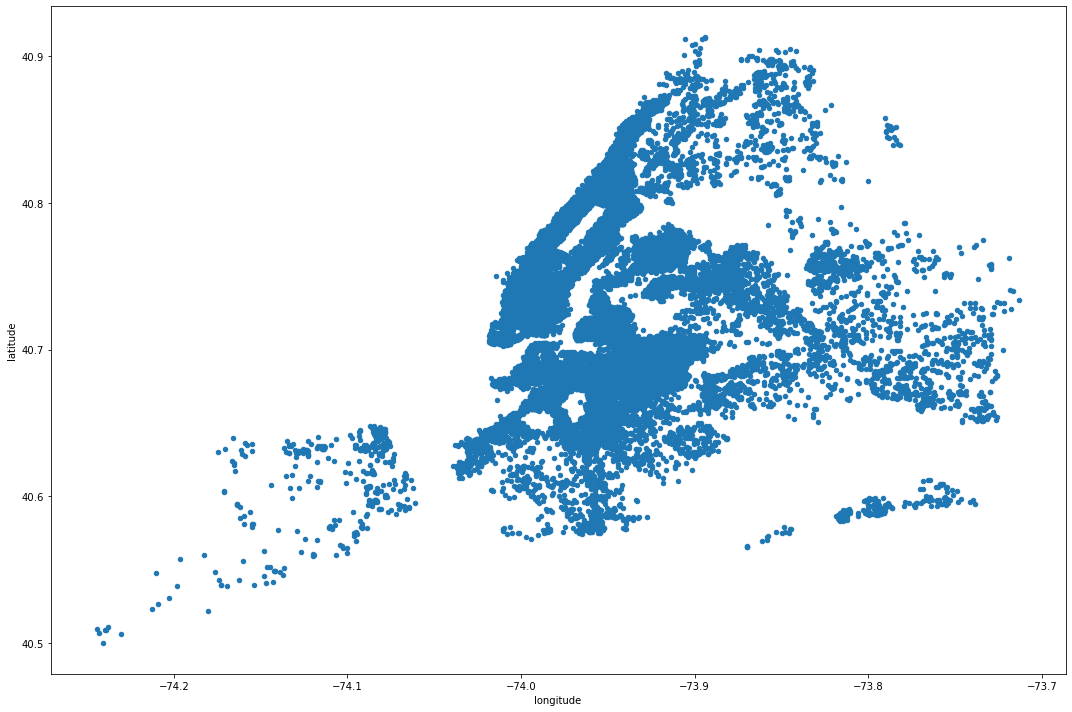

In [22]:
#create scatterplot with longitude and latitude of air BnB data
air_df.plot(kind='scatter', x = 'longitude', y = 'latitude', figsize=(15,10) )

plt.tight_layout()
# Save the figure with a dpi of 200
plt.savefig('airbnb_plot01.png', dpi=200, facecolor = 'white')
plt.show()

**Q3)** A young family would like to rent an entire apartment, west of Brooklyn (Red Hook, Sunset Park, Cobble Hill, Carroll Gardens and Bay Ridge) for a maximum of 2 weeks (14 nights).    

To help the young couple make an informed decision, decide on an appropriate graph, and construct **a single figure of multiple subplots (3 by 2)** to display the average cost of renting an `Entire home/apt` for a maximum of 2 weeks for each neighbourhood. **(35 marks)**

- Annotate the graphs with the average cost (integer value is permissible) of each stay.
- A properly labeled figure of size (15 by 15) must be displayed as the end result at the last code cell of this question.
- Save the figure with a dpi of `200` and name it `airbnb_plot02.png` (This file is to be submitted).

In [23]:

#narrow down to the desired neighborhoods in brooklyn
brookhood = ['Red Hook', 'Sunset Park', 'Cobble Hill', 'Carroll Gardens', 'Bay Ridge']
hood = air_df['neighbourhood'].isin(brookhood)
#choose those places where min nights are up to 14
maxnight = air_df['minimum_nights'] <= 14
#choose room_type as Entire home/apt
entire = air_df['room_type'] == 'Entire home/apt'
# make df with conditions
air_brooknight = air_df[hood & maxnight & entire]
# as the neighborhood group unique values are all brooklyn, no need to create condition
air_brooknight['neighbourhood_group'].unique()

array(['Brooklyn'], dtype=object)

In [24]:
#get mean prices of each neighborhood min stay periods 
group_neigh_min = air_brooknight.groupby(['neighbourhood','minimum_nights']).mean()

In [25]:
#get data for red hook
hook = air_brooknight.groupby(['neighbourhood','minimum_nights']).mean().loc['Red Hook'][:]
hook.loc[8] = np.nan
hook.loc[9] = np.nan
hook.loc[11] = np.nan
hook.loc[12] = np.nan
hook.loc[14] = np.nan
hook.sort_index(inplace = True)
#hookp = hook['price']

In [26]:
#get data for sunset park
sup = air_brooknight.groupby(['neighbourhood','minimum_nights']).mean().loc['Sunset Park'][:]
sup.loc[6] = 0
sup.loc[8] = 0
sup.loc[11] = 0
sup.loc[13] = 0
sup.sort_index(inplace = True)

In [27]:
#get data for cobble hill
chill = air_brooknight.groupby(['neighbourhood','minimum_nights']).mean().loc['Cobble Hill'][:]
chill.loc[9] = 0
chill.sort_index(inplace = True)

In [28]:
#get data for carroll gardens
cgar = air_brooknight.groupby(['neighbourhood','minimum_nights']).mean().loc['Carroll Gardens'][:]
cgar.loc[8] = 0
cgar.loc[9] = 0
cgar.loc[11] = 0
cgar.loc[12] = 0
cgar.loc[13] = 0
cgar.sort_index(inplace = True)


In [29]:
#get data for carroll gardens
bay = air_brooknight.groupby(['neighbourhood','minimum_nights']).mean().loc['Bay Ridge'][:]
bay.loc[8] = 0
bay.loc[10] = 0
bay.loc[11] = 0
bay.loc[12] = 0
bay.loc[13] = 0
bay.sort_index(inplace = True)

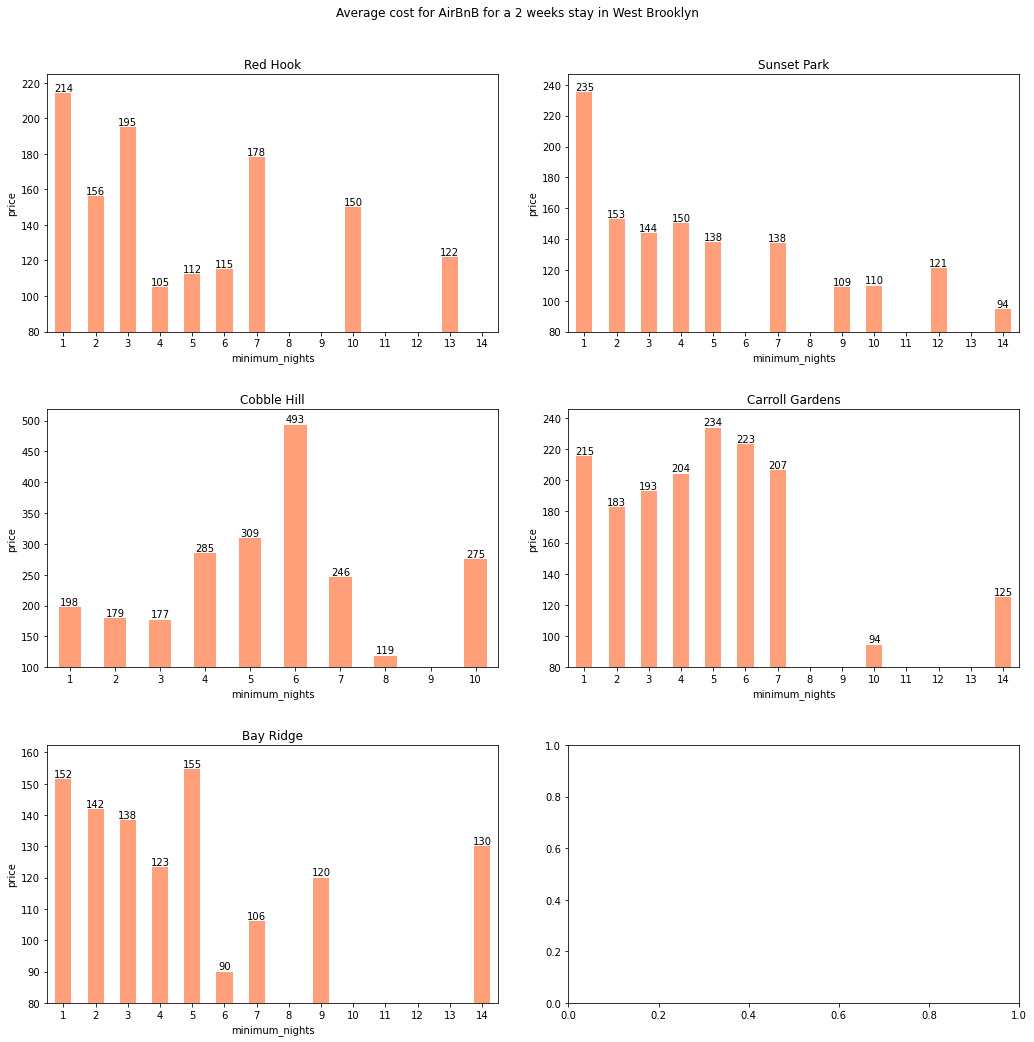

In [30]:
#creating subplots for mean min night prices for each neighborhood
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.suptitle('Average cost for AirBnB for a 2 weeks stay in West Brooklyn')

hook['price'].plot(ax = ax1, kind = 'bar', ylabel = 'price', title = 'Red Hook', color ='lightsalmon', rot=0)
ax1.set_ylim(ymin=80)

sup['price'].plot(ax = ax2, kind = 'bar', ylabel = 'price', title = 'Sunset Park', color ='lightsalmon', rot=0)
ax2.set_ylim(ymin=80)

chill['price'].plot(ax = ax3, kind = 'bar', ylabel = 'price', title = 'Cobble Hill', color ='lightsalmon', rot=0)
ax3.set_ylim(ymin=100)

cgar['price'].plot(ax = ax4, kind = 'bar', ylabel = 'price', title = 'Carroll Gardens', color ='lightsalmon', rot=0)
ax4.set_ylim(ymin=80)

bay['price'].plot(ax = ax5, kind = 'bar', ylabel = 'price', title = 'Bay Ridge', color ='lightsalmon', rot=0)
ax5.set_ylim(ymin=80)

for container in ax1.containers:
    ax1.bar_label(container, label_type = 'edge', fmt = '%.0f')

for container in ax2.containers:
    ax2.bar_label(container, label_type = 'edge', fmt = '%.0f')

for container in ax3.containers:
    ax3.bar_label(container, label_type = 'edge', fmt = '%.0f')

for container in ax4.containers:
    ax4.bar_label(container, label_type = 'edge', fmt = '%.0f')
    
for container in ax5.containers:
    ax5.bar_label(container, label_type = 'edge', fmt = '%.0f')
    
plt.tight_layout(pad = 3)
# Save the figure with a dpi of 200
plt.savefig('airbnb_plot02.png', dpi=200, facecolor = 'white')
plt.show()